### 📊 3.1 (Optional) Reading and Merging Geospatial Data for Regions
- **Objective**: Load geospatial data for various indicators across multiple regions in the Netherlands, then combine these into a unified national dataset.
- **Process**: Each indicator's data is read from regional files, concatenated into a single GeoDataFrame (`NL_gdf`), and saved as a new GeoPackage file. This enables comprehensive national-level analysis by unifying disparate regional data.
- **Importance**: Consolidating regional data facilitates efficient comparison and holistic assessment across the Netherlands, supporting informed decision-making in national policies and initiatives.

In [2]:
import geopandas as gpd
import pandas as pd
import os

# GeoDataFrame columns to merge (except the geometry, which is always merged)
indicators = ['crossroads', 'walkability', 'urbanization', 'car_ownership', 'children_household', 'age', 'education', 'public_transport', 'green_ideals', 'POIs']

# Load all gdf of the Dutch Provinces
for indicator in indicators:
    Drenthe_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Drenthe_28992.gpkg")
    Flevoland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Flevoland_28992.gpkg")
    Friesland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Friesland_28992.gpkg")
    Gelderland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Gelderland_28992.gpkg")
    Limburg_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Limburg_28992.gpkg")
    NBrabant_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_NBrabant_28992.gpkg")
    Overijssel_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Overijssel_28992.gpkg")
    Prov_Groningen_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Prov_Groningen_28992.gpkg")
    Prov_NHol_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Prov_NHol_28992.gpkg")
    Prov_Utrecht_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Prov_Utrecht_28992.gpkg")
    Zeeland_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_Zeeland_28992.gpkg")
    ZHol_gdf = gpd.read_file(rf"output/{indicator}/{indicator}_ZHol_28992.gpkg")

    # Merge all Provinces into one NL file
    NL_gdf = pd.concat([Drenthe_gdf, Flevoland_gdf, Friesland_gdf, Gelderland_gdf, Limburg_gdf, NBrabant_gdf, Overijssel_gdf, Prov_Groningen_gdf, Prov_NHol_gdf, Prov_Utrecht_gdf, Zeeland_gdf,ZHol_gdf])
    output_file = rf"output/{indicator}/{indicator}_NL_28992.gpkg"

    # Save output
    if os.path.exists(output_file):
        os.remove(output_file)

    NL_gdf.to_file(output_file, layer=f"{indicator}", driver="GPKG", mode="a")

### ✂️ 3.2 Clipping and Normalizing Indicator Scores
- **Objective**: Apply a spatial mask to focus analysis on specific areas (e.g., municipalities or quarters), z_normalize scores for various indicators, and compute a composite score.
- **Process**: This block reads indicator data, potentially clips it to a specified area (e.g., "Amersfoort"), normalizes the data, and computes a total score to evaluate spatial dynamics comprehensively. Car ownership scores are further adjusted due to their inverse relationship with shared mobility potential.
- **Importance**: Focused analysis on specific geographies aids in understanding localized patterns and dynamics, while normalization ensures meaningful comparisons between different indicators.

                             geometry  sum_score_z  sum_score_mm  \
260310  POINT (145130.978 473722.907)     0.867812      2.738510   
15283   POINT (145111.688 486513.394)     1.969909      3.840607   
267010  POINT (158542.831 466992.773)    -0.992115      0.878583   
207141   POINT (266217.17 549004.867)    -0.778384      1.092314   
318864   POINT (99004.441 474340.804)     0.975127      2.845825   
58880   POINT (188083.247 419958.737)     0.966518      2.837216   
266860  POINT (161337.551 454080.116)     0.520910      2.391607   
13378   POINT (266520.909 543753.596)    -0.873723      0.996975   
166816  POINT (190412.287 381360.061)     0.429624      2.300322   
318884   POINT (99008.052 474763.317)     1.499672      3.370370   

          walkability  z_norm_walkability  mm_norm_walkability  urban  \
260310   55217.234876           -0.191111             0.384616    3.0   
15283   120544.341860            0.263925             0.839652    4.0   
267010   36770.299492           

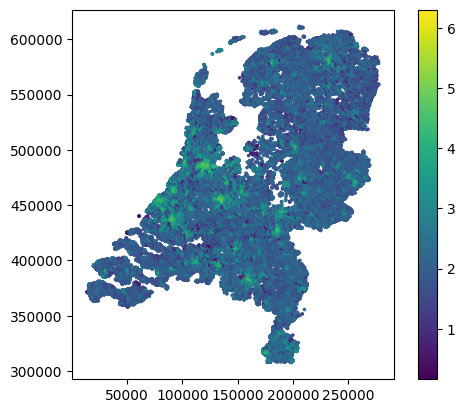

In [ ]:
import geopandas as gpd
import pandas as pd
import os

def create_mask(clipping_level, clipping_name):
    if clipping_level == "gemeenten":
        clip_gdf = gpd.read_file(input_file_clipping, layer=clipping_level)
        clip_gdf = clip_gdf[clip_gdf['gemeentenaam'] == clipping_name]
    elif clipping_level == "wijken":
        clip_gdf = gpd.read_file(input_file_clipping, layer=clipping_level)
        clip_gdf = clip_gdf[clip_gdf['wijknaam'] == clipping_name]
    else:
        clip_gdf = pd.DataFrame({'A' : []})
    return clip_gdf

area_name = "NL"
coord_system = 28992 # Needs to be a system that has meters

input_files = {
'walkability' : rf"output/walkability/walkability_{area_name}_{coord_system}.gpkg",
'urban' : rf"output/urbanization/urbanization_{area_name}_{coord_system}.gpkg",
'car_ownership' : rf"output/car_ownership/car_ownership_{area_name}_{coord_system}.gpkg",
'children_household' : rf"output/children_household/children_household_{area_name}_{coord_system}.gpkg",
'age' : rf"output/age/age_{area_name}_{coord_system}.gpkg",
'education' : rf"output/education/education_{area_name}_{coord_system}.gpkg",
'public_transport' : rf"output/public_transport/public_transport_{area_name}_{coord_system}.gpkg",
'green_ideals' : rf"output/green_ideals/green_ideals_{area_name}_{coord_system}.gpkg",
'POIs' : rf"output/POIs/POIs_{area_name}_{coord_system}.gpkg"
}

input_file_crossroads = rf"output/crossroads/crossroads_{area_name}_{coord_system}.gpkg"
input_file_clipping = "sources/wijkenbuurten_2024_v1.gpkg"
output_file = rf"output/final_scores/final_scores_{area_name}_{coord_system}.gpkg"

crossroads_gdf = gpd.read_file(input_file_crossroads)

# Clip to a specific area of interest for the analysis
# Municipality (gemeenten), Quarter (wijken) or None for no clipping
clipping_level = None 
clipping_name = "Amersfoort"

# If clipping_level = None: clip_gdf will have no influence
clip_gdf = create_mask(clipping_level, clipping_name)

final_scores_gdf = crossroads_gdf.copy()

# Clip the GeoDataFrame to clipping area
if clip_gdf.empty == False:
    final_scores_gdf = gpd.clip(final_scores_gdf, clip_gdf)

# Initiate column for use in loop
final_scores_gdf['sum_score_z'] = 0
final_scores_gdf['sum_score_mm'] = 0

# Normalize and sum up all scores
for column_name, dataframe in input_files.items():
    indicator_gdf = gpd.read_file(dataframe)

    # Z-score normalization, this is used for the linear regresion analysis, as this normalization is more suitable for statistics
    indicator_gdf[f'z_norm_{column_name}'] = (indicator_gdf[column_name] - indicator_gdf[column_name].mean()) / (indicator_gdf[column_name].max() - indicator_gdf[column_name].min())

    # Minmax-score normalization, this is used for the final score, as this normalization is more suitable for communication and visualization
    indicator_gdf[f'mm_norm_{column_name}'] = (indicator_gdf[column_name] - indicator_gdf[column_name].min()) / (indicator_gdf[column_name].max() - indicator_gdf[column_name].min())

    # High car ownership should yeild a lower score, so the score is inverted
    if column_name == 'car_ownership':
        indicator_gdf['z_norm_car_ownership'] = 1 - indicator_gdf['z_norm_car_ownership']
        indicator_gdf['mm_norm_car_ownership'] = 1 - indicator_gdf['mm_norm_car_ownership']

    # Join indicator scores to the crossroads GeoDataFrame
    final_scores_gdf = gpd.sjoin(final_scores_gdf, indicator_gdf, how='left')

    # Drop redundant columns
    final_scores_gdf = final_scores_gdf.drop(columns=['index_right'])

    # Add to sum score through loop for z-normalization (unweighted score)
    final_scores_gdf['sum_score_z'] = final_scores_gdf['sum_score_z'] + final_scores_gdf[f'z_norm_{column_name}']

    # Add to sum score through loop for minmax-normalization (unweighted score)
    final_scores_gdf['sum_score_mm'] = final_scores_gdf['sum_score_mm'] + final_scores_gdf[f'mm_norm_{column_name}']

# Drop empty rows
final_scores_gdf = final_scores_gdf.dropna()

print(final_scores_gdf.sample(10))
final_scores_gdf.plot(column='sum_score_mm', markersize=2.5, legend=True)

# Save output
if os.path.exists(output_file):
    os.remove(output_file)

final_scores_gdf.to_file(output_file, layer="final_scores", driver="GPKG", mode="a")


### 📱 3.3 Analyzing Spatial Relationships with App Usage Data (optional)
- **Objective**: Explore spatial correlations and relationships between geospatial indicator scores and real-world app usage data.
- **Process**: Nearest neighbor analysis finds app usage points close to crossroads, computes distances, and linear regression modeling reveals how various geospatial features influence these usage patterns.
- **Importance**: This analysis highlights practical effects of environmental factors (e.g., walkability, urbanization) on mobility behaviors, aiding the identification of effective policy and development strategies.

##### 3.1 Cargo bikes

In [ ]:
import geopandas as gpd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

area_name = "ZHol"
coord_system = 28992  # Meters

input_file_final_score = rf"output/final_scores/final_scores_{area_name}_{coord_system}.gpkg"
input_file_app_usage = rf"sources/appdata/BAQME rides April 2025.gpkg" # Redacted
input_file_clipping = "sources/wijkenbuurten_2024_v1.gpkg"

final_score_gdf = gpd.read_file(input_file_final_score, layer='final_scores')
app_usage_gdf = gpd.read_file(input_file_app_usage, layer='baqme_rides_april_2025') # Redacted

# Clip to a specific area of interest for the analysis
# Municipality (gemeenten), Quarter (wijken) or None for no clipping
clipping_level = None
clipping_name = "Rotterdam"

# Custom clip will override other clip
custom_clip = True

# If clipping_level = None: clip_gdf will have no influence
clip_gdf = create_mask(clipping_level, clipping_name)

if custom_clip:
    clipping_name = "Rotterdam_custom"
    input_file_custom_clip = r"sources/BAQME_Rotterdam_clip.gpkg" # Redacted
    clip_gdf = gpd.read_file(input_file_custom_clip, layer='baqme_rotterdam_clip') # Redacted

# Apply clip
if not clip_gdf.empty:
    final_score_gdf = gpd.clip(final_score_gdf, clip_gdf)
    print(f"Clipped to {clipping_name}")

# Remove points with no geometry
final_score_gdf = final_score_gdf[~final_score_gdf.geometry.is_empty]
app_usage_gdf = app_usage_gdf[~app_usage_gdf.geometry.is_empty]

# Save coords to numpy array
final_score_coords = np.array([(geom.x, geom.y) for geom in final_score_gdf.geometry])
app_usage_coords = np.array([(geom.x, geom.y) for geom in app_usage_gdf.geometry])

# Find nearest app usage points to each crossroad with Nearest Neigbour analysis
nn = NearestNeighbors(n_neighbors=50, algorithm='ball_tree')
nn.fit(app_usage_coords)
distances, indices = nn.kneighbors(final_score_coords)

# Compute sum of distances to closest usage points
final_score_gdf['sum_distances'] = distances.sum(axis=1)

# Features to use is spatial linear regression
features = ['z_norm_walkability', 'z_norm_urban', 'z_norm_car_ownership', 'z_norm_children_household',
            'z_norm_age', 'z_norm_education', 'z_norm_public_transport', 'z_norm_green_ideals', 'z_norm_POIs']

# X is independent variables, Y is dependent variable
X = final_score_gdf[features]
y = final_score_gdf['sum_distances']

# Run regression model
model = LinearRegression().fit(X, y)

# Output results
weights = dict(zip(features, model.coef_))
intercept = model.intercept_
r_squared = model.score(X, y)

print("📊 Variables and coefficients:")
for variable, coefficient in weights.items():
    print(f"- {variable}: {coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R²: {r_squared:.4f}")

In [ ]:

import statsmodels.api as sm

# Run statsmodels analysis for detailed regression report
# Add intercept for statsmodels analysis
X = sm.add_constant(X)

# Run statsmodel
model = sm.OLS(y, X).fit()

# Create dataframe with coefficients and significance
weights_df = pd.DataFrame({
    "variable": X.columns,
    "coefficient": model.params.values,
    "p_value": model.pvalues.values,
    "t_stat": model.tvalues.values,
    "std_err": model.bse.values
})

# Show full summary with coefficients, std err, t-values, and p-values
print(model.summary())

### 🔍 3.4 Visualizing Data Relationships with a Correlation Matrix (optional)
- **Objective**: Visualize correlations between different normalized geospatial indicators to understand their interdependencies and relationships.
- **Process**: The correlation matrix is generated using `seaborn` and `matplotlib`, highlighting statistical relationships between indicators through visual means.
- **Importance**: Visualization aids in identifying strong correlations that can drive strategic decision-making, highlighting potential areas for intervention or complementary policy approaches.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to include in correlation matrix
features = ['z_norm_walkability', 'z_norm_urban', 'z_norm_car_ownership', 'z_norm_children_household',
            'z_norm_age', 'z_norm_education', 'z_norm_public_transport', 'z_norm_green_ideals', 'z_norm_POIs']
# Drop rows with missing values for these features
clean_data = final_score_gdf[features].dropna()

# Compute correlation
corr_matrix = clean_data.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    annot_kws={"size": 10}
)
plt.title("Correlation Matrix of Independent Variables")
plt.tight_layout()
plt.show()


### 3.5 Weighting and Visualizing the Final Scores 🏋️‍♂️
- **Objective**: Adjust the final scores of geospatial data using weighted coefficients based on their relative importance. Visualize the weighted scores to enhance understanding of their spatial distribution.
- **Process**:
  - **Load Data**: Read the previously calculated final scores stored in a GeoPackage file for analysis.
  - **Compute Weights**: Create a DataFrame from regression weights, normalizing the absolute values to derive a scale of importance.
  - **Apply Weights**: Iterate over the variables, adjusting each by its weight and summing these to calculate a new, weighted score for each location.
  - **Visualization**: Plot the weighted scores using GeoPandas to facilitate a quick visual overview of high-scoring locations.
  - **Save Results**: Store the weighted score results in a new GeoPackage file, ensuring the weighted analysis is retained for further use or sharing.
- **Importance**: Weighting scores based on relative influence allows for a better evaluation of locations for shared mobility services.

Custom weights: 
                     variable  weights
0                 z_norm_age        1
1       z_norm_car_ownership        1
2  z_norm_children_household        1
3           z_norm_education        1
4        z_norm_green_ideals        1
5                z_norm_POIs        1
6    z_norm_public_transport        1
7               z_norm_urban        1
8         z_norm_walkability        1


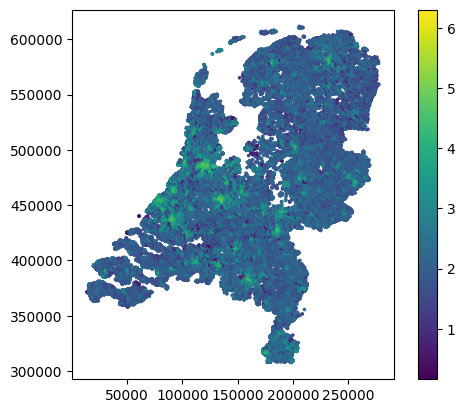

In [1]:
import geopandas as gpd
import pandas as pd
import os

area_name = "NL"
coord_system = 28992  # Meters
form_factor = "cargobike"

input_file_final_scores = rf"output/final_scores/final_scores_{area_name}_{coord_system}.gpkg"
output_file_final_scores_weighted = rf"output/final_scores/final_scores_weighted_{area_name}_{form_factor}_{coord_system}.gpkg"

# If set to True, custom weights can be assigned tot the minmax normalized values. 
# If set to False, the script will use the coefficients from the spatial linear regression model and will be assigned to the minmax normalized values.
use_custom_weights = True

if use_custom_weights:
    weight_age = 1
    weight_car_ownership = 1
    weight_children_household = 1
    weight_education = 1
    weight_green_ideals = 1
    weight_POIs = 1
    weight_public_transport = 1
    weight_urban = 1
    weight_walkability = 1
    weights_df = pd.DataFrame(data = {'variable': ['z_norm_age', 'z_norm_car_ownership', 'z_norm_children_household', 
                                                   'z_norm_education', 'z_norm_green_ideals', 'z_norm_POIs', 
                                                   'z_norm_public_transport', 'z_norm_urban', 
                                                   'z_norm_walkability'], 
                                       'weights': [weight_age, weight_car_ownership, weight_children_household, 
                                                   weight_education, weight_green_ideals, weight_POIs, 
                                                   weight_public_transport, weight_urban, weight_walkability]})

    print('Custom weights: \n', weights_df)

else:
    # Drop "const" column and keep only significant variables (p < 0.05)
    weights_df = weights_df[(weights_df["variable"] != "const") & (weights_df["p_value"] < 0.05)]


    # Divide by min (highest importance) so highest weight is 1
    weights_df['weights'] = weights_df['coefficient'] / weights_df['coefficient'].min()
    print('Weights set by linear regrission: \n', weights_df)

final_scores_gdf = gpd.read_file(input_file_final_scores, layer='final_scores')
final_scores_weighted_gdf = final_scores_gdf.copy()

# Create column for loop
final_scores_weighted_gdf['mm_sum_score'] = 0

# Loop over variables with weights
for z_variable in weights_df['variable']:
    # Replace the z-score norm for the minmax norm for increased interpretability
    mm_variable = z_variable.replace('z_norm', 'mm_norm')
    final_scores_weighted_gdf[mm_variable] = final_scores_weighted_gdf[mm_variable] * weights_df.loc[weights_df.variable.eq(z_variable), "weights"].iloc[0]
    # Add up scores to sum_score
    final_scores_weighted_gdf['mm_sum_score'] = final_scores_weighted_gdf['mm_sum_score'] + final_scores_weighted_gdf[mm_variable]

final_scores_weighted_gdf.plot(column='mm_sum_score', markersize=2.5, legend=True)

# Drop redundant columns
final_scores_weighted_gdf = final_scores_weighted_gdf.drop(columns=['sum_score_mm'])

# Save output
if os.path.exists(output_file_final_scores_weighted):
    os.remove(output_file_final_scores_weighted)

final_scores_weighted_gdf.to_file(output_file_final_scores_weighted, layer="final_scores_weighted", driver="GPKG", mode="a")